In [1]:
from matplotlib import pyplot as plt
from slab import datamanagement
from slab import dsfit
from slab import dataanalysis
from slab.datamanagement import SlabFile
from numpy import *
%matplotlib inline

sys.path.append(r'C:\Users\slab\Google Drive\grad school\schuster lab')
from data_cache import dataCacheProxy
from Analysis.Modules import common, fit, anal
from Analysis.Modules.static_surface import *

from IPython.display import Image

## $S_{21}$ and $S_{11}$ measurements without helium

In [12]:
d = dataCacheProxy(expInst='nwa_scan', filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151104\123520_nwa_scan\nwa_scan.h5')

d.index()

[u'fpoints', u'mags', u'phases']

f0 : 8021858490.816383 +/- 1298.034267
FWHM : 1485283.257519 +/- 3033.069333
Fano factor : 7.302330 +/- 0.029262
Amplitude : 0.000020 +/- 0.000000


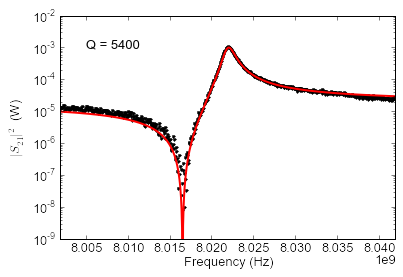

In [13]:
fpts = d.get('fpoints')[0]
mags = d.get('mags')[0]
phis = d.get('phases')[0]

center = fpts[argmax(mags)]
fitspan = 40E6

linear_mags = dataanalysis.dBm_to_W(mags)
fit_guess = [center, 0.9E6, 0.02, 1E-3]

fig = plt.figure()
common.configure_axes(13)
plt.plot(fpts, linear_mags, '.k')
#plt.plot(fpts, dsfit.asym_lorfunc(fpts, *fit_guess), 'b', lw=2.0)

fr = dsfit.fit_fano(fpts, linear_mags, fitparams=fit_guess, domain=(center-fitspan/2., center+fitspan/2.))

plt.plot(fpts, dsfit.fano_func(fpts, *fr[0]), 'r', lw=2.0)
plt.yscale('log')
plt.xlim((center-fitspan/2., center+fitspan/2.))
plt.xlabel('Frequency (Hz)')
plt.ylabel('$|S_{21}|^2$ (W)')
plt.ylim(1E-9, 1E-2)

plt.text(8.005E9, 1E-3, "Q = %d"%(fr[0][0]/fr[0][1]))
common.save_figure(fig)

In [4]:
d = dataCacheProxy(expInst='nwa_scan', filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151104\131042_nwa_scan\nwa_scan.h5')

d.index()

[u'fpoints', u'mags', u'phases']

Q = 5400


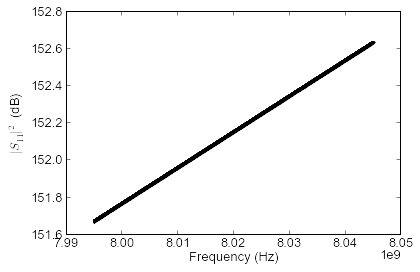

In [5]:
fpts = d.get('fpoints')[0]
mags = d.get('mags')[0]
phis = d.get('phases')[0]

a = -2.08
b = 1.0 / 0.052E9
#center = fpts[argmax(mags)]
#fitspan = 40E6

#linear_mags = dataanalysis.dBm_to_W(mags)
#fit_guess = [center, 0.9E6, 0.02, 1E-3]

plt.figure()
common.configure_axes(13)
plt.plot(fpts, linear_mags + (a + b * fpts), '.k')
#plt.plot(fpts, dsfit.asym_lorfunc(fpts, *fit_guess), 'b', lw=2.0)

#fr = dsfit.fit_fano(fpts, linear_mags, fitparams=fit_guess, domain=(center-fitspan/2., center+fitspan/2.))

#plt.plot(fpts, dsfit.fano_func(fpts, *fr[0]), 'r', lw=2.0)
#plt.yscale('log')
#plt.xlim((center-fitspan/2., center+fitspan/2.))
plt.xlabel('Frequency (Hz)')
plt.ylabel('$|S_{11}|^2$ (dB)')

print "Q = %d"%(fr[0][0]/fr[0][1])

## Power sweep without helium

In [6]:
d = dataCacheProxy(expInst='nwa_scan', 
                   filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151104\162730_nwa_power_sweep\nwa_power_sweep.h5')

d.index()

[u'fpoints', u'mags', u'nwa_config', u'phases', u'powers', u'temperature']

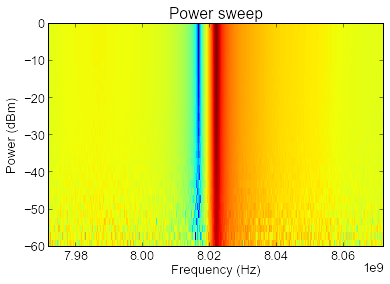

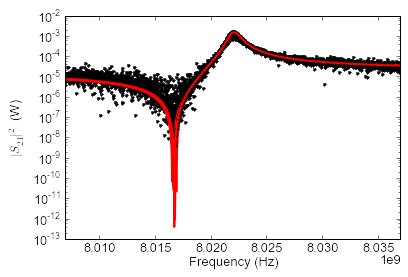

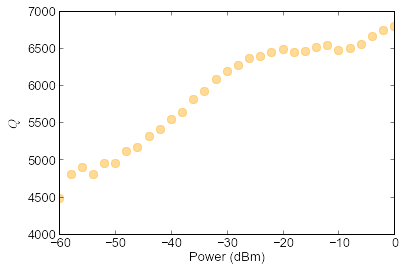

In [10]:
fpts = d.get('fpoints')
mags = d.get('mags')
phis = d.get('phases')
P = d.get('powers')

fig1 = plt.figure()
common.configure_axes(13)
plt.pcolor(fpts[0,:], P, mags)
plt.title('Power sweep')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Power (dBm)')
plt.xlim(min(fpts[0,:]), max(fpts[0,:]))

common.save_figure(fig1)

plt.figure()
common.configure_axes(13)

Qs = list()

for idx, p in enumerate(P):
    center = fpts[idx,argmax(mags[idx,:])]
    fitspan = 30E6

    linear_mags = dataanalysis.dBm_to_W(mags[idx,:])
    fit_guess = [center, 1.4E6, 7, 1E-3]

    #plt.figure()
    plt.plot(fpts[idx,:], linear_mags, '.k')
    #plt.plot(fpts[idx,:], dsfit.asym_lorfunc(fpts[idx,:], *fit_guess), 'b', lw=2.0)
    plt.yscale('log')
    
    fr = dsfit.fit_fano(fpts[idx,:], array(linear_mags, dtype=float64), 
                        fitparams=fit_guess, domain=(center-fitspan/2., center+fitspan/2.), verbose=False)

    plt.plot(fpts[idx,:], dsfit.fano_func(fpts[idx,:], *fr[0]), 'r', lw=2.0)
    
    plt.xlim((center-fitspan/2., center+fitspan/2.))
    plt.xlabel('Frequency (Hz)')
    plt.ylabel('$|S_{21}|^2$ (W)')

    Qs.append(fr[0][0]/fr[0][1])
    
fig = plt.figure()
plt.plot(P, array(Qs), 'o', **common.plot_opt('orange'))
plt.xlabel('Power (dBm)')
plt.ylabel('$Q$')

#common.save_figure(fig)

## Level meter experiment

0 1 2 3 4 5 6 7 8 9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53 54 55 56 57 58 59 fit 59 failed
60 61 62 63 64 65 66 67 68 69 The final resonance frequency is 7.997289 GHz


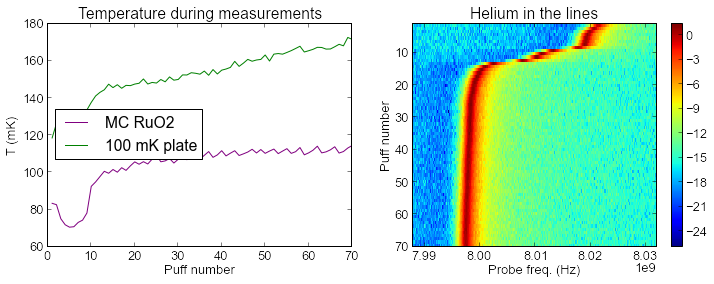

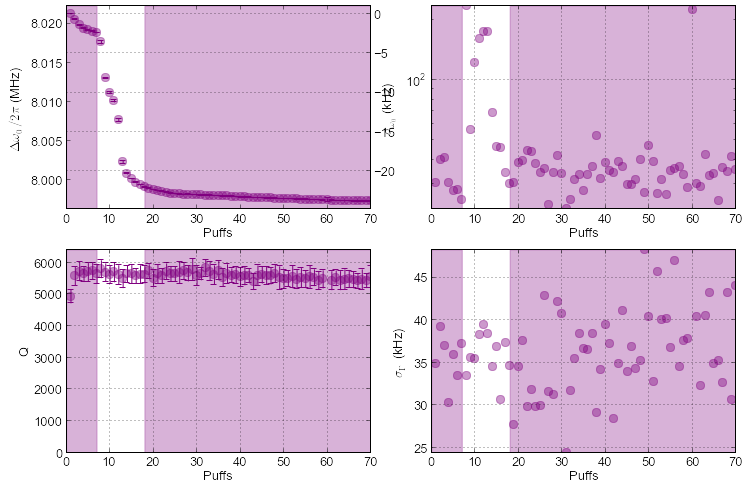

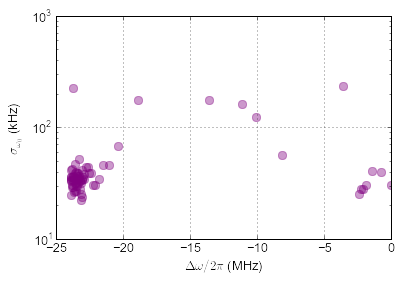

In [17]:
reload(anal)
df = r'S:\_Data\151028 - EonHe - M007 recap\data\151104\180155_level_meter_expt\level_meter_expt.h5'

anal.vibrations_from_helium([df], 25, fitspan=20E6, fitfunction=dsfit.fit_fano, fitguess=None, 
                            domains = [[0,7], [18,70]],
                            savename=r'S:\Gerwin\iPython notebooks\Figures\20151112_levelmeter_expt.png');

## Temperature dependence

5 minutes between each successive measurement

* 95 mK - 0 $\mu$W - 091551_studying_vibrations
* 165 mK - 200 $\mu$W - 092331_studying_vibrations
* 205 mK - 300 $\mu$W - 093154_studying_vibrations
* 235 mK - 400 $\mu$W - 093844_studying_vibrations
* 280 mK - 600 $\mu$W - 094505_studying_vibrations
* 350 mK - 900 $\mu$W - 095139_studying_vibrations
* 420 mK - 1200 $\mu$W - 095822_studying_vibrations
* 700 mK - 2500 $\mu$W - 100957_studying_vibrations

Mean is 7.99746412022 GHz, standard deviation is 19.8017397138 kHz
Mean is 7.99743841039 GHz, standard deviation is 18.2504834968 kHz
Mean is 7.99742859051 GHz, standard deviation is 15.154327306 kHz
Mean is 7.99742722087 GHz, standard deviation is 19.1036367236 kHz
Mean is 7.99742677105 GHz, standard deviation is 18.6118591517 kHz
Mean is 7.99740506591 GHz, standard deviation is 22.8836223469 kHz
Mean is 7.99738475614 GHz, standard deviation is 16.765952012 kHz
Mean is 7.99722147788 GHz, standard deviation is 15.4559143729 kHz


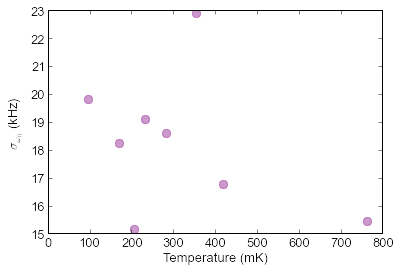

In [16]:
data_dir = r'S:\_Data\151028 - EonHe - M007 recap\data\151105'
dfs = ['091551_studying_vibrations', 
       '092331_studying_vibrations', 
       '093154_studying_vibrations', 
       '093844_studying_vibrations',
       '094505_studying_vibrations',
       '095139_studying_vibrations',
       '095822_studying_vibrations',
       '100957_studying_vibrations'
      ]

stdw0s = list()
MCRuO2 = list()

for df in dfs: 
    meanw0, stdw0, meanQ, stdQ, T = anal.study_vibrations(os.path.join(data_dir, df, 'studying_vibrations.h5'), 
                                                          do_plot=False, verbose=False)
    stdw0s.append(stdw0)
    MCRuO2.append(T['MC RuO2'])
    
plt.figure()
common.configure_axes(13)
plt.plot(array(MCRuO2)*1E3, array(stdw0s) / 1E3, 'o', **common.plot_opt('purple'))
plt.xlabel('Temperature (mK)')
plt.ylabel('$\sigma_{\omega_0}$ (kHz)')

## Noise spectrum

In [105]:
d = dataCacheProxy(expInst='nwa_scan', 
                   filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151105\121419_alazar_scope\alazar_scope.h5')

t = d.get('t')
ch2 = d.get('ch2')

Maximum contribution to signal is 9.90e-02 for a frequency of 0.00e+00 Hz


(1.0, 10000.0)

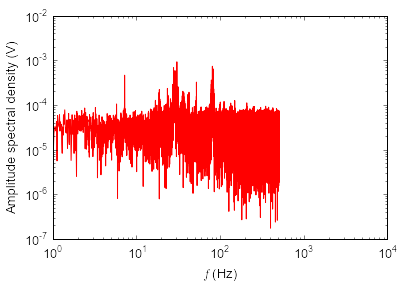

In [106]:
f, Y = common.plot_spectrum(ch2[0,:], t[0,:])
plt.xscale('log')
plt.ylim(1E-7, 1E-2)
plt.xlim(1E0, 1E4)

Maximum contribution to signal is 9.90e-02 for a frequency of 0.00e+00 Hz
RMS of the signal is 9.122 mV, computed from 1.01 to 99.98 Hz
With frequency sensitivity of 0.65 mV/kHz we get a RMS frequency jitter of 14.03 kHz
RMS of the signal is 3.475 mV, computed from 301.01 to 399.98 Hz


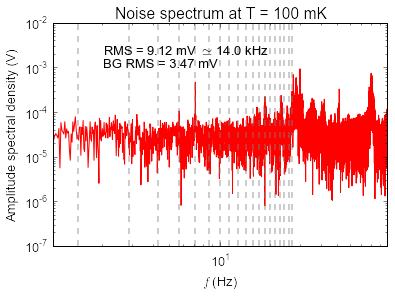

In [107]:
f, Y = common.plot_spectrum(ch2[0,:], t[0,:])
plt.ylim(1E-7, 1E-2)
#plt.xlim(1E0, 1E2)

for k in range(20):
    plt.plot([1.42*k, 1.42*k], [1E-7, 1E-2], '--', color='gray', lw=2.0, alpha=0.4)

plt.xscale('log')

f_selection = logical_and(f>1, f<100)
selected_Y = Y[f_selection]

print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_Y) * 1E3, min(f[f_selection]), max(f[f_selection]))
print "With frequency sensitivity of 0.65 mV/kHz we get a RMS frequency jitter of %.2f kHz" % (anal.get_frequency_rms(selected_Y) * 1E3 /0.65)
print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_bgY) * 1E3, min(f[f_bgselection]), max(f[f_bgselection]))

plt.xlim(min(f[f_selection]), max(f[f_selection]))
plt.title('Noise spectrum at T = 100 mK')
plt.text(2, 2E-3, r"RMS = %.2f mV $\simeq$ %.1f kHz"%(anal.get_frequency_rms(selected_Y) * 1E3, anal.get_frequency_rms(selected_Y) * 1E3 /0.65))
plt.text(2, 1E-3, "BG RMS = %.2f mV"%(anal.get_frequency_rms(selected_bgY) * 1E3))

fig = plt.gcf()
#common.save_figure(fig)

At elevated temperature (~750 mK)

Maximum contribution to signal is 1.18e-01 for a frequency of 0.00e+00 Hz
RMS of the signal is 3.620 mV, computed from 1.01 to 99.98 Hz
With frequency sensitivity of 0.65 mV/kHz we get a RMS frequency jitter of 5.57 kHz
RMS of the signal is 3.475 mV, computed from 301.01 to 399.98 Hz


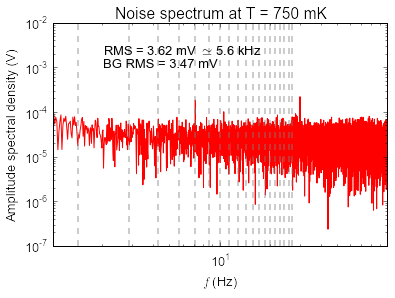

In [108]:
d = dataCacheProxy(expInst='nwa_scan', 
                   filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151105\122642_alazar_scope\alazar_scope.h5')

t = d.get('t')
ch2 = d.get('ch2')

f, Y = common.plot_spectrum(ch2[0,:], t[0,:])
plt.ylim(1E-7, 1E-2)
#plt.xlim(1E0, 1E2)

for k in range(20):
    plt.plot([1.42*k, 1.42*k], [1E-7, 1E-2], '--', color='gray', lw=2.0, alpha=0.4)

plt.xscale('log')

f_selection = logical_and(f>1, f<100)
selected_Y = Y[f_selection]

print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_Y) * 1E3, min(f[f_selection]), max(f[f_selection]))
print "With frequency sensitivity of 0.65 mV/kHz we get a RMS frequency jitter of %.2f kHz" % (anal.get_frequency_rms(selected_Y) * 1E3 /0.65)
print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_bgY) * 1E3, min(f[f_bgselection]), max(f[f_bgselection]))

plt.xlim(min(f[f_selection]), max(f[f_selection]))
plt.title('Noise spectrum at T = 750 mK')
plt.text(2, 2E-3, r"RMS = %.2f mV $\simeq$ %.1f kHz"%(anal.get_frequency_rms(selected_Y) * 1E3, anal.get_frequency_rms(selected_Y) * 1E3 /0.65))
plt.text(2, 1E-3, "BG RMS = %.2f mV"%(anal.get_frequency_rms(selected_bgY) * 1E3))

fig = plt.gcf()
#common.save_figure(fig)

or at 1.05 K

Maximum contribution to signal is 1.09e-01 for a frequency of 0.00e+00 Hz
RMS of the signal is 3.543 mV, computed from 1.01 to 99.98 Hz
With frequency sensitivity of 0.65 mV/kHz we get a RMS frequency jitter of 5.45 kHz
RMS of the signal is 3.475 mV, computed from 301.01 to 399.98 Hz


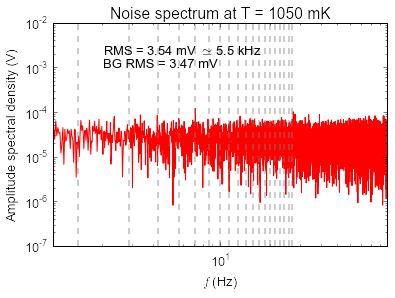

In [109]:
d = dataCacheProxy(expInst='nwa_scan', 
                   filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151105\125836_alazar_scope\alazar_scope.h5')

t = d.get('t')
ch2 = d.get('ch2')

f, Y = common.plot_spectrum(ch2[0,:], t[0,:])
plt.ylim(1E-7, 1E-2)
#plt.xlim(1E0, 1E2)

for k in range(20):
    plt.plot([1.42*k, 1.42*k], [1E-7, 1E-2], '--', color='gray', lw=2.0, alpha=0.4)

plt.xscale('log')

f_selection = logical_and(f>1, f<100)
selected_Y = Y[f_selection]

print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_Y) * 1E3, min(f[f_selection]), max(f[f_selection]))
print "With frequency sensitivity of 0.65 mV/kHz we get a RMS frequency jitter of %.2f kHz" % (anal.get_frequency_rms(selected_Y) * 1E3 /0.65)

f_bgselection = logical_and(f>301, f<400)
selected_bgY = Y[f_bgselection]
print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_bgY) * 1E3, min(f[f_bgselection]), max(f[f_bgselection]))

plt.xlim(min(f[f_selection]), max(f[f_selection]))
plt.title('Noise spectrum at T = 1050 mK')
plt.text(2, 2E-3, r"RMS = %.2f mV $\simeq$ %.1f kHz"%(anal.get_frequency_rms(selected_Y) * 1E3, anal.get_frequency_rms(selected_Y) * 1E3 /0.65))
plt.text(2, 1E-3, "BG RMS = %.2f mV"%(anal.get_frequency_rms(selected_bgY) * 1E3))

fig = plt.gcf()
#common.save_figure(fig)

## A little higher resolution

I set the amplification of the SRS to 200 and set the frequency of the pump tone such that the mean voltage was approx. 0. This did not correspond to the center of the slope, but since the fluctuations are much smaller than $\kappa$, this is still a valid method

Maximum contribution to signal is 1.88e-02 for a frequency of 0.00e+00 Hz
RMS of the signal is 31.434 mV, computed from 1.01 to 99.98 Hz
With frequency sensitivity of 4 * 0.65 mV/kHz we get a RMS frequency jitter of 12.09 kHz
RMS of the signal is 14.229 mV, computed from 301.01 to 399.98 Hz


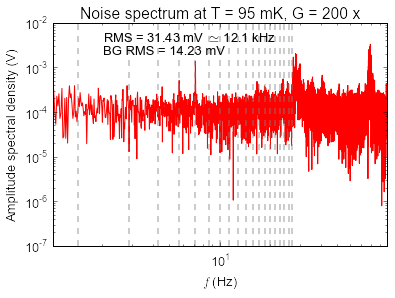

In [124]:
d = dataCacheProxy(expInst='nwa_scan', 
                   filepath=r'S:\_Data\151028 - EonHe - M007 recap\data\151106\103242_alazar_scope\alazar_scope.h5')

t = d.get('t')
ch2 = d.get('ch2')

f, Y = common.plot_spectrum(ch2[0,:], t[0,:])
plt.ylim(1E-7, 1E-2)
#plt.xlim(1E0, 1E2)

for k in range(20):
    plt.plot([1.42*k, 1.42*k], [1E-7, 1E-2], '--', color='gray', lw=2.0, alpha=0.4)

plt.xscale('log')

f_selection = logical_and(f>1, f<100)
selected_Y = Y[f_selection]

print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_Y) * 1E3, min(f[f_selection]), max(f[f_selection]))
print "With frequency sensitivity of 4 * 0.65 mV/kHz we get a RMS frequency jitter of %.2f kHz" % (anal.get_frequency_rms(selected_Y) * 1E3 /(4*0.65))

f_bgselection = logical_and(f>301, f<400)
selected_bgY = Y[f_bgselection]
print "RMS of the signal is %.3f mV, computed from %.2f to %.2f Hz" % \
(anal.get_frequency_rms(selected_bgY) * 1E3, min(f[f_bgselection]), max(f[f_bgselection]))

plt.xlim(min(f[f_selection]), max(f[f_selection]))
plt.title('Noise spectrum at T = 95 mK, G = 200 x')
plt.text(2, 4E-3, r"RMS = %.2f mV $\simeq$ %.1f kHz"%(anal.get_frequency_rms(selected_Y) * 1E3, anal.get_frequency_rms(selected_Y) * 1E3 /(4*0.65)))
plt.text(2, 2E-3, "BG RMS = %.2f mV"%(anal.get_frequency_rms(selected_bgY) * 1E3))

fig = plt.gcf()
common.save_figure(fig)

## DC bias sweep

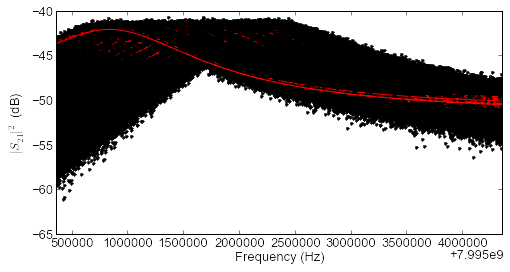

In [18]:
biasV, meanw0s, meanQs, stdw0s, stdQs = \
anal.dcbias_sweep(df = r'S:\_Data\151028 - EonHe - M007 recap\data\151106\104837_dc_bias_sweep\dc_bias_sweep.h5', 
                 do_plot=True, fitspan=4E6)

Fit results for y = a0 + a1*(x-a2)**2 with 1 sigma confidence intervals
---------------------------------------------------------------------
a0 = -0.02412282277 +/- 0.00713248604349
a1 = -0.00398065625312 +/- 3.79883117194e-05
a2 = 0.0303958242848 +/- 0.0504538975314


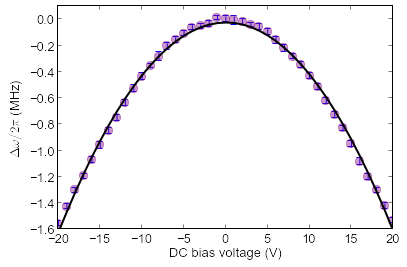

In [19]:
dw = (meanw0s-meanw0s[common.find_nearest(0, biasV)])/1E6

fr = dsfit.fit_parabola(biasV, dw, fitparams=[0, +1, +1])

fig=plt.figure()
plt.errorbar(biasV, dw, yerr=stdw0s/1E6, fmt='o', **common.plot_opt('purple'))
plt.plot(biasV, dsfit.parabolafunc(biasV, *fr[0]), lw=2.0, color='k')
plt.xlabel('DC bias voltage (V)')
plt.ylabel(r'$\Delta \omega/2\pi$ (MHz)')
plt.xlim(-20, 20)
plt.ylim(-1.6, 0.1)

#common.save_figure(fig)

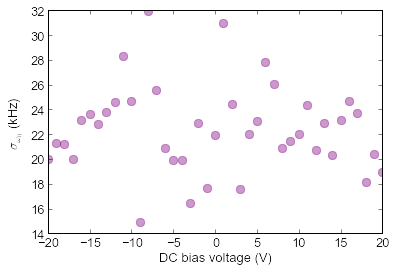

In [20]:
fig = plt.figure()
plt.plot(biasV, stdw0s/1E3, 'o', **common.plot_opt('purple'))
plt.xlabel('DC bias voltage (V)')
plt.ylabel(r'$\sigma_{\omega_0}$ (kHz)')
plt.xlim(-20, 20)

#common.save_figure(fig)